# Prediksi Tipe Wine Alkohol Atau Non Alkohol

### Import Library

In [41]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import sklearn
import keras

### Load Dataset

In [42]:
dataset = pd.read_csv("C:/Users/Adithia Jo/Documents/Anaconda/Machine learning/ANN/Wine/wine_dataset.csv")

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD180/OD205 of diluted wines    178 non-null float64
Proline                         178 non-null int64
Wine Type                       178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Melihat Persebaran Data
Untuk data numerik

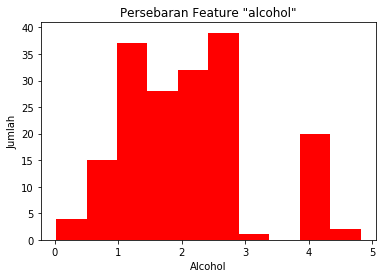

In [44]:
plt.hist(dataset['Alcohol'], color="red")
plt.xlabel("Alcohol")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "alcohol"')
plt.show()

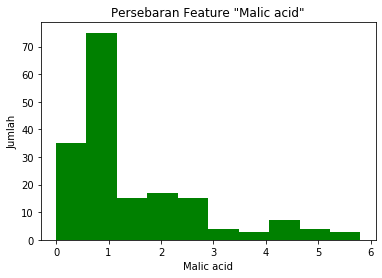

In [45]:
plt.hist(dataset['Malic acid'], color="green")
plt.xlabel("Malic acid")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "Malic acid"')
plt.show()

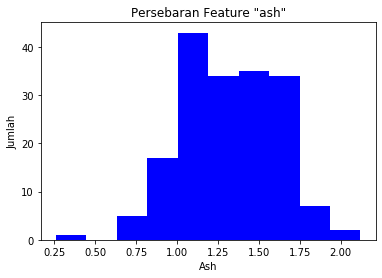

In [46]:
plt.hist(dataset['Ash'], color="blue")
plt.xlabel("Ash")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "ash"')
plt.show()

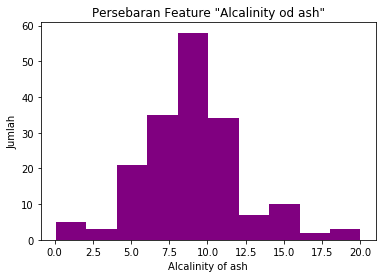

In [47]:
plt.hist(dataset['Alcalinity of ash'], color="purple")
plt.xlabel("Alcalinity of ash")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "Alcalinity od ash"')
plt.show()

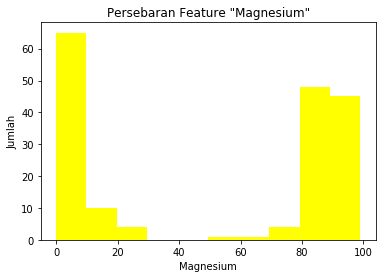

In [48]:
plt.hist(dataset['Magnesium'], color="yellow")
plt.xlabel("Magnesium")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "Magnesium"')
plt.show()

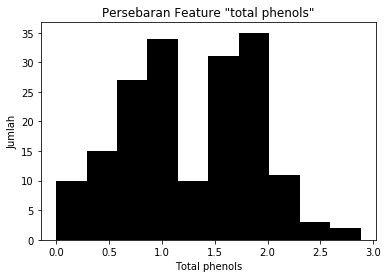

In [49]:
plt.hist(dataset['Total phenols'], color="black")
plt.xlabel("Total phenols")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "total phenols"')
plt.show()

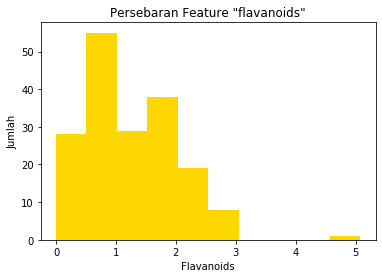

In [50]:
plt.hist(dataset['Flavanoids'], color="gold")
plt.xlabel("Flavanoids")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "flavanoids"')
plt.show()

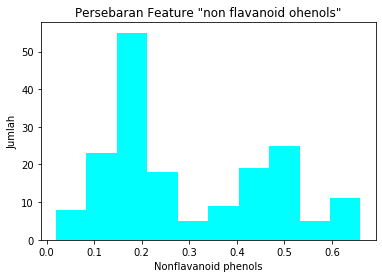

In [51]:
plt.hist(dataset['Nonflavanoid phenols'], color="aqua")
plt.xlabel("Nonflavanoid phenols")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "non flavanoid ohenols"')
plt.show()

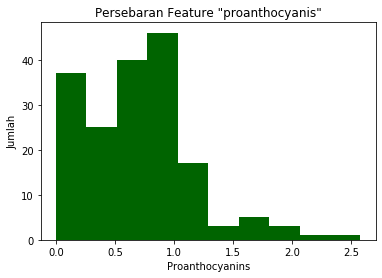

In [52]:
plt.hist(dataset['Proanthocyanins'], color="darkgreen")
plt.xlabel("Proanthocyanins")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "proanthocyanis"')
plt.show()

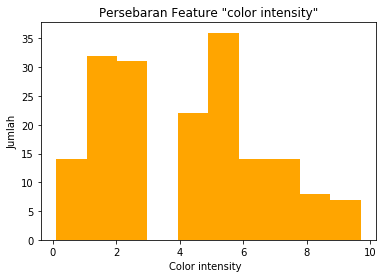

In [53]:
plt.hist(dataset['Color intensity'], color="orange")
plt.xlabel("Color intensity  ")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "color intensity"')
plt.show()

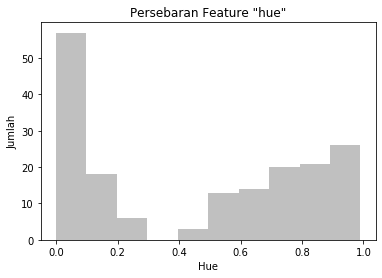

In [54]:
plt.hist(dataset['Hue'], color="silver")
plt.xlabel("Hue")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "hue"')
plt.show()

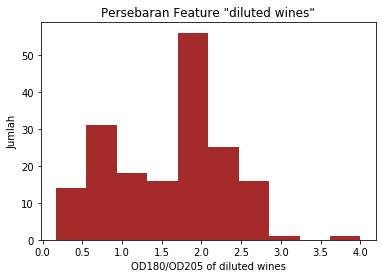

In [55]:
plt.hist(dataset['OD180/OD205 of diluted wines'], color="brown")
plt.xlabel("OD180/OD205 of diluted wines")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "diluted wines"')
plt.show()

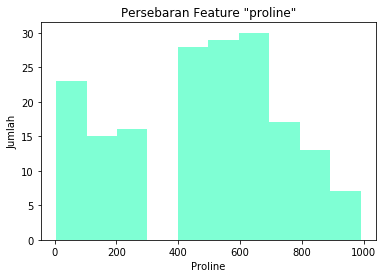

In [56]:
plt.hist(dataset['Proline'], color="aquamarine")
plt.xlabel("Proline")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "proline"')
plt.show()

### Set data dan Target
Set data untuk feature yaitu kolom 1-13, dan kolom 14 sebagai target

In [61]:
data_raw = dataset.iloc[:,0:13].values
target = dataset.iloc[:,13].values

In [62]:
dataa=pd.DataFrame(data_raw)
dataa

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.12,0.70,1.42,5.6,17.0,1.80,2.06,0.18,1.19,5.64,0.04,2.91,65.0
1,2.10,0.78,1.04,0.1,0.0,1.65,1.76,0.16,0.18,4.28,0.05,2.40,50.0
2,2.06,1.26,1.67,8.6,0.0,1.80,2.14,0.20,1.80,5.68,0.02,2.07,85.0
3,4.27,0.95,1.50,6.8,2.0,2.85,2.49,0.14,1.08,7.80,0.86,2.45,480.0
4,2.14,1.59,1.87,10.0,8.0,1.80,1.69,0.29,0.81,4.21,0.04,1.92,725.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.70,5.65,1.45,10.5,95.0,0.68,0.60,0.51,0.06,7.70,0.64,0.74,740.0
174,2.40,2.90,1.48,12.0,1.0,0.80,0.75,0.42,0.40,7.20,0.70,0.56,750.0
175,2.17,4.18,1.16,10.0,10.0,0.59,0.69,0.42,0.25,0.10,0.59,0.56,825.0
176,2.07,1.59,1.27,10.0,10.0,0.65,0.68,0.52,0.46,9.20,0.60,0.61,840.0


### Scaling
Karena dilihat pada persebaran data, agar data tidak memiliki standar deviasi yang tinggi, maka selanjutnya akan discaling, dimana nilai max adalah 1 dan minimal adalah 0

In [63]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data_raw)

#Buat Variabel data_dataframe hanya untuk menampilkan, selanjutnya variabel data akan tetap dalam bentuk numpy array
data_dataframe = pd.DataFrame(data)
data_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.854167,0.120690,0.623656,0.276382,0.171717,0.625000,0.405512,0.250000,0.461240,0.577083,0.040404,0.715405,0.060914
1,0.433333,0.134483,0.419355,0.000000,0.000000,0.572917,0.346457,0.218750,0.069767,0.435417,0.050505,0.582245,0.045685
2,0.425000,0.217241,0.758065,0.427136,0.000000,0.625000,0.421260,0.281250,0.697674,0.581250,0.020202,0.496084,0.081218
3,0.885417,0.163793,0.666667,0.336683,0.020202,0.989583,0.490157,0.187500,0.418605,0.802083,0.868687,0.595300,0.482234
4,0.441667,0.274138,0.865591,0.497487,0.080808,0.625000,0.332677,0.421875,0.313953,0.428125,0.040404,0.456919,0.730964


In [64]:
# number of Wine classes
classifications = 3

### Splitting
Membagi data secara acak, dengan persentase 80% untuk data latih, 20% untuk data testing. Random state digunakan agar data yang sudah baik, tidak diacak lagi saat spliting, agar persebaran data tidak berubah, yang bisa mempengaruhi learning dari model.

In [65]:
data_training, data_testing, target_training, target_testing = train_test_split(data_raw, target, test_size=0.2, random_state=42)

In [66]:
## mengcopy nilai asli sebelum di encoding
target_real=target_testing

### One hot encoding

In [67]:
target_training = keras.utils.to_categorical(target_training-1, classifications)
target_testing = keras.utils.to_categorical(target_testing-1, classifications)

### MODEL
Menggunakan 1 input layer dengan 13 neuron, 1 hidden layer dengan 30 neuron (fungsi aktivasi relu), dan 1 output layer dengan 1 neuron (fungsi aktivasi softmax).

In [68]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(classifications, activation='softmax'))

### Compile Data
Menggunakan categorical_crossentropy, dan metric Akurasi sebagai parameternya

In [69]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

### FIT
Proses training model. Disini akan dilakukan training model, dimana JST akan melakukan learning berdasarkan data latih yaitu **data_training** (feature) dan **target_training** (target). Disini juga dilakukan validasi dengan data uji, ditampung pada variabel **data_testing** (feature) dan **target_testing** (target). Guna dilakukan FIT adalah agar setiap epochnya dapat ditampung dalam variabel **history_validasi**, sehingga bisa diplot perubahannya.

In [70]:
history_validasi = model.fit(data_training,target_training, validation_data=(data_testing,target_testing), epochs=1000)


Train on 142 samples, validate on 36 samples
Epoch 1/1000
142/142 [==============================] - 0s 1ms/step - loss: 171.1114 - accuracy: 0.4014 - val_loss: 133.6295 - val_accuracy: 0.3889
Epoch 2/1000
142/142 [==============================] - 0s 85us/step - loss: 153.6289 - accuracy: 0.4014 - val_loss: 117.9539 - val_accuracy: 0.4167
Epoch 3/1000
142/142 [==============================] - 0s 106us/step - loss: 135.0284 - accuracy: 0.4014 - val_loss: 102.9147 - val_accuracy: 0.4444
Epoch 4/1000
142/142 [==============================] - 0s 106us/step - loss: 118.6390 - accuracy: 0.3662 - val_loss: 94.4390 - val_accuracy: 0.3056
Epoch 5/1000
142/142 [==============================] - 0s 106us/step - loss: 112.5535 - accuracy: 0.2324 - val_loss: 87.9327 - val_accuracy: 0.3056
Epoch 6/1000
142/142 [==============================] - 0s 113us/step - loss: 102.8311 - accuracy: 0.2817 - val_loss: 82.0531 - val_accuracy: 0.4722
Epoch 7/1000
142/142 [==============================] - 0s 1

Epoch 55/1000
142/142 [==============================] - 0s 99us/step - loss: 0.7298 - accuracy: 0.6620 - val_loss: 0.8885 - val_accuracy: 0.7222
Epoch 56/1000
142/142 [==============================] - 0s 113us/step - loss: 0.7073 - accuracy: 0.7254 - val_loss: 0.9170 - val_accuracy: 0.7778
Epoch 57/1000
142/142 [==============================] - 0s 92us/step - loss: 0.7052 - accuracy: 0.6972 - val_loss: 0.9012 - val_accuracy: 0.7500
Epoch 58/1000
142/142 [==============================] - 0s 113us/step - loss: 0.7494 - accuracy: 0.7183 - val_loss: 0.8674 - val_accuracy: 0.7500
Epoch 59/1000
142/142 [==============================] - 0s 99us/step - loss: 0.6610 - accuracy: 0.7394 - val_loss: 0.8865 - val_accuracy: 0.7500
Epoch 60/1000
142/142 [==============================] - 0s 99us/step - loss: 0.6710 - accuracy: 0.7113 - val_loss: 0.8564 - val_accuracy: 0.7500
Epoch 61/1000
142/142 [==============================] - 0s 92us/step - loss: 0.6999 - accuracy: 0.6972 - val_loss: 0.9224

Epoch 111/1000
142/142 [==============================] - 0s 106us/step - loss: 0.3904 - accuracy: 0.8380 - val_loss: 0.5891 - val_accuracy: 0.9167
Epoch 112/1000
142/142 [==============================] - 0s 106us/step - loss: 0.4205 - accuracy: 0.8028 - val_loss: 0.6266 - val_accuracy: 0.8889
Epoch 113/1000
142/142 [==============================] - 0s 106us/step - loss: 0.4567 - accuracy: 0.7606 - val_loss: 0.5713 - val_accuracy: 0.8889
Epoch 114/1000
142/142 [==============================] - 0s 99us/step - loss: 0.4616 - accuracy: 0.8099 - val_loss: 0.5960 - val_accuracy: 0.9444
Epoch 115/1000
142/142 [==============================] - 0s 92us/step - loss: 0.4167 - accuracy: 0.8239 - val_loss: 0.5779 - val_accuracy: 0.8889
Epoch 116/1000
142/142 [==============================] - 0s 92us/step - loss: 0.3634 - accuracy: 0.8662 - val_loss: 0.5780 - val_accuracy: 0.9167
Epoch 117/1000
142/142 [==============================] - 0s 106us/step - loss: 0.3269 - accuracy: 0.8732 - val_los

142/142 [==============================] - 0s 99us/step - loss: 0.2469 - accuracy: 0.9296 - val_loss: 0.4722 - val_accuracy: 0.9444
Epoch 167/1000
142/142 [==============================] - 0s 113us/step - loss: 0.2460 - accuracy: 0.9437 - val_loss: 0.4753 - val_accuracy: 0.9444
Epoch 168/1000
142/142 [==============================] - 0s 92us/step - loss: 0.2434 - accuracy: 0.9085 - val_loss: 0.4691 - val_accuracy: 0.9444
Epoch 169/1000
142/142 [==============================] - 0s 106us/step - loss: 0.2510 - accuracy: 0.9225 - val_loss: 0.4670 - val_accuracy: 0.9444
Epoch 170/1000
142/142 [==============================] - 0s 92us/step - loss: 0.2585 - accuracy: 0.9155 - val_loss: 0.4687 - val_accuracy: 0.9444
Epoch 171/1000
142/142 [==============================] - 0s 85us/step - loss: 0.2574 - accuracy: 0.9155 - val_loss: 0.4637 - val_accuracy: 0.9444
Epoch 172/1000
142/142 [==============================] - 0s 99us/step - loss: 0.2538 - accuracy: 0.9225 - val_loss: 0.4810 - val_a

142/142 [==============================] - 0s 85us/step - loss: 0.2187 - accuracy: 0.9296 - val_loss: 0.4350 - val_accuracy: 0.9444
Epoch 222/1000
142/142 [==============================] - 0s 99us/step - loss: 0.2305 - accuracy: 0.9437 - val_loss: 0.4280 - val_accuracy: 0.9444
Epoch 223/1000
142/142 [==============================] - 0s 99us/step - loss: 0.2129 - accuracy: 0.9296 - val_loss: 0.4210 - val_accuracy: 0.9444
Epoch 224/1000
142/142 [==============================] - 0s 92us/step - loss: 0.2119 - accuracy: 0.9437 - val_loss: 0.4233 - val_accuracy: 0.9444
Epoch 225/1000
142/142 [==============================] - 0s 99us/step - loss: 0.2107 - accuracy: 0.9437 - val_loss: 0.4325 - val_accuracy: 0.9722
Epoch 226/1000
142/142 [==============================] - 0s 99us/step - loss: 0.2056 - accuracy: 0.9507 - val_loss: 0.4220 - val_accuracy: 0.9444
Epoch 227/1000
142/142 [==============================] - 0s 113us/step - loss: 0.2127 - accuracy: 0.9507 - val_loss: 0.4257 - val_ac

142/142 [==============================] - 0s 99us/step - loss: 0.2009 - accuracy: 0.9225 - val_loss: 0.3886 - val_accuracy: 0.9444
Epoch 277/1000
142/142 [==============================] - 0s 120us/step - loss: 0.1959 - accuracy: 0.9577 - val_loss: 0.4021 - val_accuracy: 0.9722
Epoch 278/1000
142/142 [==============================] - 0s 85us/step - loss: 0.1878 - accuracy: 0.9437 - val_loss: 0.3913 - val_accuracy: 0.9444
Epoch 279/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1961 - accuracy: 0.9437 - val_loss: 0.4339 - val_accuracy: 0.9444
Epoch 280/1000
142/142 [==============================] - 0s 127us/step - loss: 0.2191 - accuracy: 0.9155 - val_loss: 0.3954 - val_accuracy: 0.9444
Epoch 281/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1995 - accuracy: 0.9577 - val_loss: 0.4070 - val_accuracy: 0.9722
Epoch 282/1000
142/142 [==============================] - 0s 120us/step - loss: 0.2241 - accuracy: 0.9225 - val_loss: 0.3826 - val_

142/142 [==============================] - 0s 92us/step - loss: 0.2041 - accuracy: 0.9225 - val_loss: 0.4085 - val_accuracy: 0.9722
Epoch 332/1000
142/142 [==============================] - 0s 106us/step - loss: 0.2215 - accuracy: 0.9296 - val_loss: 0.4036 - val_accuracy: 0.8889
Epoch 333/1000
142/142 [==============================] - 0s 113us/step - loss: 0.1947 - accuracy: 0.9225 - val_loss: 0.4272 - val_accuracy: 0.9722
Epoch 334/1000
142/142 [==============================] - ETA: 0s - loss: 0.2536 - accuracy: 0.96 - 0s 106us/step - loss: 0.2114 - accuracy: 0.9296 - val_loss: 0.4387 - val_accuracy: 0.9167
Epoch 335/1000
142/142 [==============================] - 0s 99us/step - loss: 0.2488 - accuracy: 0.9014 - val_loss: 0.3607 - val_accuracy: 0.9444
Epoch 336/1000
142/142 [==============================] - 0s 92us/step - loss: 0.1690 - accuracy: 0.9577 - val_loss: 0.4215 - val_accuracy: 0.9722
Epoch 337/1000
142/142 [==============================] - 0s 106us/step - loss: 0.1989 -

142/142 [==============================] - 0s 92us/step - loss: 0.2456 - accuracy: 0.8732 - val_loss: 0.4324 - val_accuracy: 0.8611
Epoch 387/1000
142/142 [==============================] - 0s 85us/step - loss: 0.2280 - accuracy: 0.9155 - val_loss: 0.4076 - val_accuracy: 0.9444
Epoch 388/1000
142/142 [==============================] - 0s 106us/step - loss: 0.2022 - accuracy: 0.9296 - val_loss: 0.3868 - val_accuracy: 0.9722
Epoch 389/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1845 - accuracy: 0.9366 - val_loss: 0.3475 - val_accuracy: 0.9444
Epoch 390/1000
142/142 [==============================] - 0s 113us/step - loss: 0.1674 - accuracy: 0.9507 - val_loss: 0.3841 - val_accuracy: 0.9722
Epoch 391/1000
142/142 [==============================] - 0s 106us/step - loss: 0.1652 - accuracy: 0.9507 - val_loss: 0.3441 - val_accuracy: 0.9444
Epoch 392/1000
142/142 [==============================] - 0s 106us/step - loss: 0.1688 - accuracy: 0.9648 - val_loss: 0.3607 - val

142/142 [==============================] - 0s 92us/step - loss: 0.1667 - accuracy: 0.9507 - val_loss: 0.3379 - val_accuracy: 0.9444
Epoch 442/1000
142/142 [==============================] - 0s 85us/step - loss: 0.1654 - accuracy: 0.9437 - val_loss: 0.3200 - val_accuracy: 0.9444
Epoch 443/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1842 - accuracy: 0.9296 - val_loss: 0.4125 - val_accuracy: 0.9722
Epoch 444/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1631 - accuracy: 0.9225 - val_loss: 0.3188 - val_accuracy: 0.9444
Epoch 445/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1939 - accuracy: 0.9296 - val_loss: 0.3744 - val_accuracy: 0.9722
Epoch 446/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1919 - accuracy: 0.9225 - val_loss: 0.3575 - val_accuracy: 0.9444
Epoch 447/1000
142/142 [==============================] - 0s 113us/step - loss: 0.1900 - accuracy: 0.9437 - val_loss: 0.4025 - val_ac

142/142 [==============================] - 0s 99us/step - loss: 0.1397 - accuracy: 0.9648 - val_loss: 0.3514 - val_accuracy: 0.9722
Epoch 497/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1504 - accuracy: 0.9577 - val_loss: 0.3135 - val_accuracy: 0.9444
Epoch 498/1000
142/142 [==============================] - 0s 120us/step - loss: 0.1391 - accuracy: 0.9577 - val_loss: 0.3370 - val_accuracy: 0.9722
Epoch 499/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1340 - accuracy: 0.9577 - val_loss: 0.3176 - val_accuracy: 0.9722
Epoch 500/1000
142/142 [==============================] - 0s 106us/step - loss: 0.1436 - accuracy: 0.9507 - val_loss: 0.3405 - val_accuracy: 0.9722
Epoch 501/1000
142/142 [==============================] - 0s 113us/step - loss: 0.1611 - accuracy: 0.9366 - val_loss: 0.3130 - val_accuracy: 0.9444
Epoch 502/1000
142/142 [==============================] - 0s 106us/step - loss: 0.1967 - accuracy: 0.9155 - val_loss: 0.3487 - val

142/142 [==============================] - 0s 99us/step - loss: 0.1292 - accuracy: 0.9507 - val_loss: 0.3061 - val_accuracy: 0.9722
Epoch 552/1000
142/142 [==============================] - 0s 106us/step - loss: 0.1314 - accuracy: 0.9577 - val_loss: 0.3449 - val_accuracy: 0.9444
Epoch 553/1000
142/142 [==============================] - 0s 113us/step - loss: 0.1529 - accuracy: 0.9507 - val_loss: 0.2887 - val_accuracy: 0.9444
Epoch 554/1000
142/142 [==============================] - 0s 113us/step - loss: 0.1471 - accuracy: 0.9437 - val_loss: 0.3959 - val_accuracy: 0.9167
Epoch 555/1000
142/142 [==============================] - 0s 92us/step - loss: 0.1401 - accuracy: 0.9507 - val_loss: 0.3294 - val_accuracy: 0.9167
Epoch 556/1000
142/142 [==============================] - 0s 85us/step - loss: 0.2354 - accuracy: 0.9155 - val_loss: 0.5309 - val_accuracy: 0.8611
Epoch 557/1000
142/142 [==============================] - 0s 92us/step - loss: 0.2252 - accuracy: 0.8944 - val_loss: 0.4984 - val_

142/142 [==============================] - 0s 106us/step - loss: 0.1270 - accuracy: 0.9718 - val_loss: 0.2844 - val_accuracy: 0.9722
Epoch 607/1000
142/142 [==============================] - 0s 92us/step - loss: 0.1308 - accuracy: 0.9648 - val_loss: 0.2898 - val_accuracy: 0.9722
Epoch 608/1000
142/142 [==============================] - 0s 106us/step - loss: 0.1347 - accuracy: 0.9507 - val_loss: 0.3181 - val_accuracy: 0.9722
Epoch 609/1000
142/142 [==============================] - 0s 113us/step - loss: 0.1245 - accuracy: 0.9648 - val_loss: 0.2793 - val_accuracy: 0.9444
Epoch 610/1000
142/142 [==============================] - 0s 106us/step - loss: 0.1274 - accuracy: 0.9648 - val_loss: 0.3138 - val_accuracy: 0.9722
Epoch 611/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1212 - accuracy: 0.9718 - val_loss: 0.2835 - val_accuracy: 0.9722
Epoch 612/1000
142/142 [==============================] - 0s 106us/step - loss: 0.1173 - accuracy: 0.9718 - val_loss: 0.2939 - va

142/142 [==============================] - 0s 106us/step - loss: 0.1200 - accuracy: 0.9648 - val_loss: 0.3017 - val_accuracy: 0.9722
Epoch 662/1000
142/142 [==============================] - 0s 106us/step - loss: 0.1100 - accuracy: 0.9718 - val_loss: 0.3304 - val_accuracy: 0.9722
Epoch 663/1000
142/142 [==============================] - 0s 184us/step - loss: 0.1168 - accuracy: 0.9648 - val_loss: 0.2668 - val_accuracy: 0.9444
Epoch 664/1000
142/142 [==============================] - 0s 85us/step - loss: 0.1284 - accuracy: 0.9648 - val_loss: 0.2891 - val_accuracy: 0.9722
Epoch 665/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1057 - accuracy: 0.9718 - val_loss: 0.2838 - val_accuracy: 0.9722
Epoch 666/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1135 - accuracy: 0.9648 - val_loss: 0.2908 - val_accuracy: 0.9722
Epoch 667/1000
142/142 [==============================] - 0s 78us/step - loss: 0.1077 - accuracy: 0.9648 - val_loss: 0.2988 - val_

Epoch 717/1000
142/142 [==============================] - 0s 92us/step - loss: 0.1273 - accuracy: 0.9648 - val_loss: 0.2932 - val_accuracy: 0.9722
Epoch 718/1000
142/142 [==============================] - 0s 92us/step - loss: 0.1177 - accuracy: 0.9648 - val_loss: 0.3250 - val_accuracy: 0.9444
Epoch 719/1000
142/142 [==============================] - 0s 71us/step - loss: 0.1392 - accuracy: 0.9577 - val_loss: 0.3025 - val_accuracy: 0.9722
Epoch 720/1000
142/142 [==============================] - 0s 85us/step - loss: 0.1439 - accuracy: 0.9437 - val_loss: 0.2669 - val_accuracy: 0.9722
Epoch 721/1000
142/142 [==============================] - 0s 85us/step - loss: 0.1525 - accuracy: 0.9437 - val_loss: 0.3450 - val_accuracy: 0.9444
Epoch 722/1000
142/142 [==============================] - 0s 78us/step - loss: 0.1545 - accuracy: 0.9296 - val_loss: 0.2808 - val_accuracy: 0.9722
Epoch 723/1000
142/142 [==============================] - 0s 78us/step - loss: 0.1155 - accuracy: 0.9507 - val_loss: 0

142/142 [==============================] - 0s 99us/step - loss: 0.1498 - accuracy: 0.9366 - val_loss: 0.2906 - val_accuracy: 0.9722
Epoch 773/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1289 - accuracy: 0.9577 - val_loss: 0.2854 - val_accuracy: 0.9722
Epoch 774/1000
142/142 [==============================] - 0s 113us/step - loss: 0.0983 - accuracy: 0.9648 - val_loss: 0.2489 - val_accuracy: 0.9722
Epoch 775/1000
142/142 [==============================] - 0s 92us/step - loss: 0.1306 - accuracy: 0.9648 - val_loss: 0.3080 - val_accuracy: 0.9722
Epoch 776/1000
142/142 [==============================] - ETA: 0s - loss: 0.0889 - accuracy: 0.93 - 0s 120us/step - loss: 0.1196 - accuracy: 0.9577 - val_loss: 0.2337 - val_accuracy: 0.9167
Epoch 777/1000
142/142 [==============================] - 0s 106us/step - loss: 0.1355 - accuracy: 0.9718 - val_loss: 0.2978 - val_accuracy: 0.9722
Epoch 778/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1048 - 

142/142 [==============================] - 0s 85us/step - loss: 0.1056 - accuracy: 0.9648 - val_loss: 0.2453 - val_accuracy: 0.9722
Epoch 828/1000
142/142 [==============================] - 0s 85us/step - loss: 0.0942 - accuracy: 0.9718 - val_loss: 0.2695 - val_accuracy: 0.9722
Epoch 829/1000
142/142 [==============================] - 0s 85us/step - loss: 0.0971 - accuracy: 0.9577 - val_loss: 0.2553 - val_accuracy: 0.9722
Epoch 830/1000
142/142 [==============================] - 0s 85us/step - loss: 0.0916 - accuracy: 0.9718 - val_loss: 0.2465 - val_accuracy: 0.9722
Epoch 831/1000
142/142 [==============================] - 0s 85us/step - loss: 0.1060 - accuracy: 0.9718 - val_loss: 0.2903 - val_accuracy: 0.9722
Epoch 832/1000
142/142 [==============================] - 0s 92us/step - loss: 0.1248 - accuracy: 0.9507 - val_loss: 0.2276 - val_accuracy: 0.9722
Epoch 833/1000
142/142 [==============================] - 0s 85us/step - loss: 0.1057 - accuracy: 0.9577 - val_loss: 0.2904 - val_acc

Epoch 883/1000
142/142 [==============================] - 0s 85us/step - loss: 0.1714 - accuracy: 0.9366 - val_loss: 0.3540 - val_accuracy: 0.9444
Epoch 884/1000
142/142 [==============================] - 0s 78us/step - loss: 0.1184 - accuracy: 0.9437 - val_loss: 0.2820 - val_accuracy: 0.9444
Epoch 885/1000
142/142 [==============================] - 0s 78us/step - loss: 0.1119 - accuracy: 0.9577 - val_loss: 0.3084 - val_accuracy: 0.9722
Epoch 886/1000
142/142 [==============================] - 0s 85us/step - loss: 0.1009 - accuracy: 0.9789 - val_loss: 0.3078 - val_accuracy: 0.9722
Epoch 887/1000
142/142 [==============================] - 0s 92us/step - loss: 0.1201 - accuracy: 0.9648 - val_loss: 0.2623 - val_accuracy: 0.9444
Epoch 888/1000
142/142 [==============================] - 0s 99us/step - loss: 0.1327 - accuracy: 0.9577 - val_loss: 0.3136 - val_accuracy: 0.9722
Epoch 889/1000
142/142 [==============================] - 0s 92us/step - loss: 0.1211 - accuracy: 0.9648 - val_loss: 0

142/142 [==============================] - 0s 85us/step - loss: 0.0885 - accuracy: 0.9718 - val_loss: 0.2624 - val_accuracy: 0.9722
Epoch 939/1000
142/142 [==============================] - 0s 99us/step - loss: 0.0897 - accuracy: 0.9718 - val_loss: 0.2310 - val_accuracy: 0.9722
Epoch 940/1000
142/142 [==============================] - 0s 92us/step - loss: 0.0838 - accuracy: 0.9577 - val_loss: 0.2834 - val_accuracy: 0.9722
Epoch 941/1000
142/142 [==============================] - 0s 92us/step - loss: 0.0916 - accuracy: 0.9718 - val_loss: 0.2513 - val_accuracy: 0.9722
Epoch 942/1000
142/142 [==============================] - 0s 92us/step - loss: 0.0900 - accuracy: 0.9718 - val_loss: 0.2316 - val_accuracy: 0.9722
Epoch 943/1000
142/142 [==============================] - 0s 85us/step - loss: 0.0869 - accuracy: 0.9718 - val_loss: 0.2467 - val_accuracy: 0.9722
Epoch 944/1000
142/142 [==============================] - 0s 92us/step - loss: 0.0821 - accuracy: 0.9718 - val_loss: 0.2737 - val_acc

Epoch 994/1000
142/142 [==============================] - 0s 92us/step - loss: 0.0823 - accuracy: 0.9718 - val_loss: 0.2072 - val_accuracy: 0.9722
Epoch 995/1000
142/142 [==============================] - 0s 99us/step - loss: 0.0867 - accuracy: 0.9718 - val_loss: 0.2711 - val_accuracy: 0.9722
Epoch 996/1000
142/142 [==============================] - 0s 85us/step - loss: 0.0919 - accuracy: 0.9648 - val_loss: 0.2321 - val_accuracy: 0.9722
Epoch 997/1000
142/142 [==============================] - 0s 78us/step - loss: 0.1000 - accuracy: 0.9718 - val_loss: 0.2259 - val_accuracy: 0.9722
Epoch 998/1000
142/142 [==============================] - 0s 85us/step - loss: 0.0805 - accuracy: 0.9718 - val_loss: 0.2190 - val_accuracy: 0.9722
Epoch 999/1000
142/142 [==============================] - 0s 85us/step - loss: 0.0929 - accuracy: 0.9507 - val_loss: 0.2203 - val_accuracy: 0.9722
Epoch 1000/1000
142/142 [==============================] - 0s 78us/step - loss: 0.1026 - accuracy: 0.9789 - val_loss: 

### Perhitungan Akurasi
Evaluasi dengan mencari skor data testing atau akurasi data testing. Nilai evaluasi disimpan pada variabel **scores**.

In [71]:
scores = model.evaluate(data_testing, target_testing)
print("Akurasi data Testing = %.2f%%" % (scores[1]*100))

36/36 [==============================] - 0s 111us/step
Akurasi data Testing = 97.22%


### Plot akurasi model
Evaluasi akurasi model, dibuat plot yang menunjukan perbandingan dari hasil learning pada data uji dan data latih

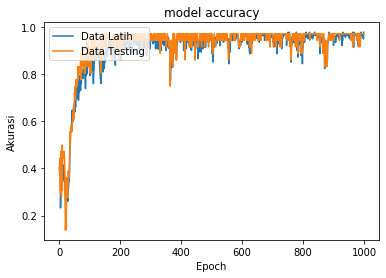

In [72]:
plt.plot(history_validasi.history['accuracy'])
plt.plot(history_validasi.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

### Plot Loss
Evaluasi loss/error model, dibuat plot yang menunjukan perbandingan dari hasil learning pada data uji dan data latih

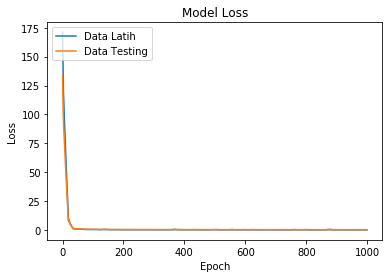

In [74]:
plt.plot(history_validasi.history['loss'])
plt.plot(history_validasi.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

### Confussion Matrix

Selanjutnya untuk mengevaluasi hasil prediksi, akan dibuat confussion matriks. Fungsinya untuk melihat hasil prediksi, yang akan digolongkan menjadi beberapa kategori. Karena klasifikasinya adalah binary (1 dan 0) maka ada 4 kemungkinan prediksi yaitu True Positive, False Positive, False Negative, True Negative. Berikut ditampilkan hasil dari setiap klasifikasinya. Pertama adalah menampun isi dari prediksi pada variabel prediction

In [79]:
from sklearn.metrics import confusion_matrix
prediction = model.predict_classes(data_testing)+1
for i in range (len(prediction)):
    if(prediction[i]==3):
        prediction[i]=0
cm = confusion_matrix(target_real, prediction)
cm

array([[13,  1,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

In [80]:
print(target_real)
print(prediction)

[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
[0 0 2 0 1 0 1 2 1 2 1 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


In [81]:
#Label 0
tp = cm[0,0]
tn = cm[1,1] + cm[2,2]  
fp = cm[1,0] + cm[2,0]  
fn = cm[0,1] + cm[0,2] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  1.0
recall :  0.9285714285714286
F1 :  0.962962962962963
spec :  1.0
sensitivity :  0.9285714285714286
akurasi :  0.9722222222222222


In [82]:
#Label 1
tp = cm[1,1]
tn = cm[0,0] + cm[2,2] 
fp = cm[0,1] + cm[2,1] 
fn = cm[1,0] + cm[1,2] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.9333333333333333
recall :  1.0
F1 :  0.9655172413793104
spec :  0.9545454545454546
sensitivity :  1.0
akurasi :  0.9722222222222222


In [83]:
#Label 2
tp = cm[2,2]
tn = cm[0,0] + cm[1,1] 
fp = cm[0,2] + cm[1,2] 
fn = cm[2,0] + cm[2,1] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  1.0
recall :  1.0
F1 :  1.0
spec :  1.0
sensitivity :  1.0
akurasi :  1.0


In [84]:
from sklearn.metrics import classification_report
print(classification_report(target_real,prediction))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

